In [93]:
import pandas as pd
from sklearn.model_selection import train_test_split
import json 
import seaborn as sns
import  matplotlib.pyplot as plt
import  matplotlib
import matplotlib.animation as animation

In [41]:
df = pd.read_csv("../Data/CleanDB_FULL_DsOrigin_RandomSample_NumCat.csv")
df_deptonames = pd.read_csv("../Data/GeoData/DptoCode_Names.csv")


C:\ProgramData\Anaconda3\envs\DS4A\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (10,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
df_deptonames

,code,Name
0,18,CAQUETÁ
1,19,CAUCA
2,86,PUTUMAYO
3,76,VALLE DEL CAUCA
4,94,GUAINÍA
5,99,VICHADA
6,85,CASANARE
7,91,AMAZONAS
8,97,VAUPÉS
9,95,GUAVIARE


In [6]:
print("Porcentaje de vivos en el df",(df[df["DS_ORIG"] == 1].shape[0]/df.shape[0])*100)
print("Porcentaje de fetales en el df",(df[df["DS_ORIG"] == 2].shape[0]/df.shape[0])*100)
print("Porcentaje de defun en el df",(df[df["DS_ORIG"] == 3].shape[0]/df.shape[0])*100)

Porcentaje de vivos en el df 93.10903646961373
Porcentaje de fetales en el df 5.760423236998027
Porcentaje de defun en el df 1.1305402933882518


In [9]:
train_df, test_df = train_test_split(df, train_size=0.2, shuffle = True, random_state=40)

In [10]:
train_df.shape

(315813, 66)

In [12]:
print("Porcentaje de vivos en el df",(train_df[train_df["DS_ORIG"] == 1].shape[0]/train_df.shape[0])*100)
print("Porcentaje de fetales en el df",(train_df[train_df["DS_ORIG"] == 2].shape[0]/train_df.shape[0])*100)
print("Porcentaje de defun en el df",(train_df[train_df["DS_ORIG"] == 3].shape[0]/train_df.shape[0])*100)

Porcentaje de vivos en el df 93.09021477899897
Porcentaje de fetales en el df 5.7774695785164
Porcentaje de defun en el df 1.1323156424846348


In [17]:
train_fetales = train_df[train_df["DS_ORIG"] == 2]
train_fetales

,Unnamed: 0,Unnamed: 0.1,APGAR1,APGAR2,AREA,AREA_RESIDENCIA_HAB,ASIS_MED,CERT_EXPEDIDO_POR,CODOCUR,COD_DPTO,...,MOMENTO_MUERTE_CAT,PARTO_ATENDIDO_POR_CAT,PROFESION_QUIEN_CERTIFICA_CAT,SEG_SOCIAL_CAT,SEXO_CAT,SITIO_EVENTO_CAT,TIEMPO_GESTACION_CAT,TIPO_PARTO_CAT,TIPO_EMBARAZO_CAT,NACIDO_VIVO_INV
901670,901670,901670,99.0,99.0,1,1.0,1.0,MEDICO_NO_TRATANTE,NaN,23,...,3,9,1,1,3,9,9,9,9,1
504930,504930,504930,99.0,99.0,1,1.0,1.0,MEDICO_TRATANTE,NaN,76,...,1,9,1,1,2,1,4,2,1,1
501035,501035,501035,99.0,99.0,1,1.0,1.0,MEDICO_TRATANTE,NaN,76,...,1,9,1,1,3,1,9,1,1,1
1096675,1096675,1096675,99.0,99.0,1,9.0,1.0,MEDICO_LEGISTA,68.0,68,...,1,9,1,1,2,1,1,3,1,1
1101882,1101882,1101882,99.0,99.0,1,1.0,1.0,MEDICO_NO_TRATANTE,NaN,76,...,1,9,1,3,3,1,9,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923253,923253,923253,99.0,99.0,1,1.0,1.0,MEDICO_LEGISTA,NaN,50,...,1,9,1,9,2,9,3,3,1,1
358378,358378,358378,99.0,99.0,3,3.0,1.0,MEDICO_TRATANTE,NaN,19,...,1,9,1,3,2,3,3,1,1,1
926627,926627,926627,99.0,99.0,1,1.0,1.0,MEDICO_TRATANTE,NaN,11,...,1,9,1,3,1,1,1,1,1,1
1551269,1551269,1551269,99.0,99.0,1,1.0,1.0,MEDICO_TRATANTE,NaN,41,...,1,9,1,3,3,1,1,1,1,1


In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 315813 entries, 1246692 to 817159
Data columns (total 66 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Unnamed: 0                     315813 non-null  int64  
 1   Unnamed: 0.1                   315813 non-null  int64  
 2   APGAR1                         315813 non-null  float64
 3   APGAR2                         315813 non-null  float64
 4   AREA                           315813 non-null  int64  
 5   AREA_RESIDENCIA_HAB            315813 non-null  float64
 6   ASIS_MED                       315813 non-null  float64
 7   CERT_EXPEDIDO_POR              315813 non-null  object 
 8   CODOCUR                        168 non-null     float64
 9   COD_DPTO                       315813 non-null  int64  
 10  COD_INST                       282444 non-null  object 
 11  DEPTO_RESIDENCIA               315813 non-null  int64  
 12  EDAD_MADRE              

In [43]:
train_fetales.groupby(["COD_DPTO"])["Unnamed: 0"].count() / train_df.groupby(["COD_DPTO"])["Unnamed: 0"].count()


COD_DPTO
5     0.066672
8     0.017966
11    0.076828
13    0.025845
15    0.025713
17    0.050051
18    0.029323
19    0.043460
20    0.016136
23    0.088650
25    0.077929
27    0.017241
41    0.108167
44    0.015746
47    0.028859
50    0.107802
52    0.083908
54    0.037071
63    0.072917
66    0.067965
68    0.027401
70    0.051528
73    0.066095
76    0.057980
81    0.127320
85    0.014544
86    0.070738
88    0.163522
91    0.016082
94    0.102236
95    0.078040
97    0.021429
99    0.045070
Name: Unnamed: 0, dtype: float64

In [44]:
df_dptos = pd.read_csv('../App/data/OutcomePerCapitaDptos.csv')
df_munic= pd.read_csv('../App/data/OutcomePerCapitaMunic.csv')

In [49]:
df_dptos[df_dptos["year"] == 2008]

,year,cod_dpto,alive,fetal,no_fetal,deaths,Total,fetal_percapita,no_fetal_percapita,alive_percapita,deaths_percapita,DPNOM,Total preg,Total pregnan,prob_alive,prob_fetal,prob_no_fetal
0,2008,5,91137,5390,1170,6560,5783831,0.093191,0.020229,1.575720,0.113420,Antioquia,97697,97697,0.932854,0.055171,0.011976
10,2008,8,42210,296,748,1044,2240312,0.013212,0.033388,1.884113,0.046601,Atlántico,43254,43254,0.975864,0.006843,0.017293
20,2008,11,129047,8463,1964,10427,6936977,0.121998,0.028312,1.860277,0.150310,"Bogotá, D.C.",139474,139474,0.925241,0.060678,0.014081
30,2008,13,29819,357,463,820,1876733,0.019022,0.024671,1.588878,0.043693,Bolívar,30639,30639,0.973237,0.011652,0.015111
40,2008,15,19118,256,238,494,1185966,0.021586,0.020068,1.612019,0.041654,Boyacá,19612,19612,0.974811,0.013053,0.012135
50,2008,17,12754,787,153,940,940316,0.083695,0.016271,1.356353,0.099966,Caldas,13694,13694,0.931357,0.057470,0.011173
60,2008,18,7268,120,179,299,330358,0.036324,0.054184,2.200038,0.090508,Caquetá,7567,7567,0.960486,0.015858,0.023655
70,2008,19,15597,318,209,527,1268319,0.025073,0.016479,1.229738,0.041551,Cauca,16124,16124,0.967316,0.019722,0.012962
80,2008,20,21307,464,363,827,966278,0.048019,0.037567,2.205059,0.085586,Cesar,22134,22134,0.962637,0.020963,0.016400
90,2008,23,26729,2020,528,2548,1585428,0.127410,0.033303,1.685917,0.160714,Córdoba,29277,29277,0.912969,0.068996,0.018035


In [135]:
df_dptos["Total pregnan"] -= df_dptos["no_fetal"]

df_dptos["fetalRatio"] = df_dptos["fetal"] / df_dptos["Total pregnan"] 
df_dptos.head()

,year,cod_dpto,alive,fetal,no_fetal,deaths,Total,fetal_percapita,no_fetal_percapita,alive_percapita,deaths_percapita,DPNOM,Total preg,Total pregnan,prob_alive,prob_fetal,prob_no_fetal,fetalRatio
0,2008,5,91137,5390,1170,6560,5783831,0.093191,0.020229,1.575720,0.113420,Antioquia,97697,96527,0.932854,0.055171,0.011976,0.055839
1,2009,5,86022,4426,958,5384,5843258,0.075745,0.016395,1.472158,0.092140,Antioquia,91406,90448,0.941098,0.048421,0.010481,0.048934
2,2010,5,77936,4531,838,5369,5902729,0.076761,0.014197,1.320338,0.090958,Antioquia,83305,82467,0.935550,0.054390,0.010059,0.054943
3,2011,5,75781,4994,777,5771,5959950,0.083793,0.013037,1.271504,0.096830,Antioquia,81552,80775,0.929235,0.061237,0.009528,0.061826
4,2012,5,76967,6008,737,6745,6013862,0.099903,0.012255,1.279827,0.112158,Antioquia,83712,82975,0.919426,0.071770,0.008804,0.072407


In [143]:
df_munic

,id_birth,count,alive,fetal,no_fetal,cod_dpto,deaths,mpio_name,year,Total,fetal_percapita,no_fetal_percapita,alive_percapita,deaths_percapita,prob_alive,prob_fetal,prob_no_fetal
0,5001,46516,43155,2664,697,5,3361,MEDELLÍN,2008,2309689,0.115340,0.030177,1.868433,0.145517,0.927745,0.057271,0.014984
1,5002,172,162,5,5,5,10,ABEJORRAL,2008,20944,0.023873,0.023873,0.773491,0.047746,0.941860,0.029070,0.029070
2,5004,18,16,2,0,5,2,ABRIAQUÍ,2008,2290,0.087336,0.000000,0.698690,0.087336,0.888889,0.111111,0.000000
3,5021,45,43,2,0,5,2,ALEJANDRÍA,2008,4020,0.049751,0.000000,1.069652,0.049751,0.955556,0.044444,0.000000
4,5030,191,184,7,0,5,7,AMAGÁ,2008,28331,0.024708,0.000000,0.649465,0.024708,0.963351,0.036649,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10411,97889,6,6,0,0,97,0,YAVARATÉ,2017,1027,0.000000,0.000000,0.584226,0.000000,1.000000,0.000000,0.000000
10412,99001,522,469,43,10,99,53,PUERTO CARREÑO,2017,21087,0.203917,0.047423,2.224119,0.251340,0.898467,0.082375,0.019157
10413,99524,47,44,1,2,99,3,LA PRIMAVERA,2017,10233,0.009772,0.019545,0.429981,0.029317,0.936170,0.021277,0.042553
10414,99624,35,35,0,0,99,0,SANTA ROSALÍA,2017,4083,0.000000,0.000000,0.857213,0.000000,1.000000,0.000000,0.000000


In [144]:
df_munic["Total pregnan"] = df_munic["fetal"] + df_munic["alive"]

df_munic["fetalRatio"] = df_munic["fetal"] / df_munic["Total pregnan"] 
df_munic.head()

,id_birth,count,alive,fetal,no_fetal,cod_dpto,deaths,mpio_name,year,Total,fetal_percapita,no_fetal_percapita,alive_percapita,deaths_percapita,prob_alive,prob_fetal,prob_no_fetal,Total pregnan,fetalRatio
0,5001,46516,43155,2664,697,5,3361,MEDELLÍN,2008,2309689,0.115340,0.030177,1.868433,0.145517,0.927745,0.057271,0.014984,45819,0.058142
1,5002,172,162,5,5,5,10,ABEJORRAL,2008,20944,0.023873,0.023873,0.773491,0.047746,0.941860,0.029070,0.029070,167,0.029940
2,5004,18,16,2,0,5,2,ABRIAQUÍ,2008,2290,0.087336,0.000000,0.698690,0.087336,0.888889,0.111111,0.000000,18,0.111111
3,5021,45,43,2,0,5,2,ALEJANDRÍA,2008,4020,0.049751,0.000000,1.069652,0.049751,0.955556,0.044444,0.000000,45,0.044444
4,5030,191,184,7,0,5,7,AMAGÁ,2008,28331,0.024708,0.000000,0.649465,0.024708,0.963351,0.036649,0.000000,191,0.036649


In [178]:
df_dptos.sort_values(by="Total",ascending=False)

,year,cod_dpto,alive,fetal,no_fetal,deaths,Total,fetal_percapita,no_fetal_percapita,alive_percapita,deaths_percapita,DPNOM,Total preg,Total pregnan,prob_alive,prob_fetal,prob_no_fetal,fetalRatio
29,2017,11,108969,8639,1178,9817,7333415,0.117803,0.016063,1.485924,0.133867,"Bogotá, D.C.",118786,117608,0.917356,0.072727,0.009917,0.073456
28,2016,11,114013,9943,1228,11171,7290415,0.136385,0.016844,1.563875,0.153229,"Bogotá, D.C.",125184,123956,0.910763,0.079427,0.009810,0.080214
27,2015,11,118077,11644,1202,12846,7253823,0.160522,0.016571,1.627790,0.177093,"Bogotá, D.C.",130923,129721,0.901881,0.088938,0.009181,0.089762
26,2014,11,117877,10875,1360,12235,7226652,0.150485,0.018819,1.631143,0.169304,"Bogotá, D.C.",130112,128752,0.905966,0.083582,0.010453,0.084465
25,2013,11,116219,11417,1369,12786,7197326,0.158628,0.019021,1.614752,0.177649,"Bogotá, D.C.",129005,127636,0.900888,0.088500,0.010612,0.089450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2008,94,559,40,14,54,21622,0.184997,0.064749,2.585330,0.249746,Guainía,613,599,0.911909,0.065253,0.022838,0.066778
313,2011,97,651,19,26,45,21097,0.090060,0.123240,3.085747,0.213300,Vaupés,696,670,0.935345,0.027299,0.037356,0.028358
312,2010,97,607,13,10,23,20056,0.064819,0.049860,3.026526,0.114679,Vaupés,630,620,0.963492,0.020635,0.015873,0.020968
311,2009,97,575,13,17,30,18305,0.071019,0.092871,3.141218,0.163890,Vaupés,605,588,0.950413,0.021488,0.028099,0.022109


In [179]:
import plotly.express as px

In [208]:
temp = df_dptos[df_dptos["year"] == 2017].sort_values(by="fetalRatio",ascending=True)
fig = px.bar(temp,x= "fetalRatio",y = "DPNOM")

fig.update_layout(
    
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
    ),
    paper_bgcolor='white',
    plot_bgcolor='white',
)

In [253]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=1,vertical_spacing=0.1)

fig.append_trace(go.Bar(
    x= temp["fetalRatio"],y =temp["DPNOM"],#width=5,
    marker=dict(
        color='#21928a',
        line=dict(
            color='#33608c',
            width=1)
    ),
    name='Household savings, percentage of household disposable income',
    orientation='h',
#     width = 5
), 1, 1)


fig.update_layout(
#     title='Household savings & net worth for eight OECD countries',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=0, r=0, t=0, b=0),
    paper_bgcolor='white',
    plot_bgcolor='white',
)

annotations = []

y_s = np.round(temp["fetalRatio"]*100, decimals=2)
# y_nw = np.rint(y_net_worth)

# Adding labels
for yd, xd, pos in zip(y_s, temp["DPNOM"],temp["fetalRatio"]):
    
    # labeling the bar net worth
    annotations.append(dict(xref='x', yref='y',
                            y=xd, x=pos + 0.05,
                            text=str(yd) + '%',
                            font=dict(family='Arial', size=12,
                                      color='#33608c'),
                            showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()

,year,cod_dpto,alive,fetal,no_fetal,deaths,Total,fetal_percapita,no_fetal_percapita,alive_percapita,deaths_percapita,DPNOM,Total preg,Total pregnan,prob_alive,prob_fetal,prob_no_fetal,fetalRatio
279,2017,88,804,192,15,207,61504,0.312175,0.024389,1.307232,0.336563,"Archipiélago de San Andrés, Providencia y Sant...",1011,996,0.795252,0.189911,0.014837,0.192771
269,2017,86,4195,689,17,706,332774,0.207047,0.005109,1.260615,0.212156,Putumayo,4901,4884,0.855948,0.140584,0.003469,0.141073
309,2017,95,1279,193,10,203,77276,0.249754,0.012941,1.655106,0.262695,Guaviare,1482,1472,0.863023,0.130229,0.006748,0.131114
249,2017,81,4647,658,25,683,239211,0.275071,0.010451,1.942636,0.285522,Arauca,5330,5305,0.871857,0.123452,0.004690,0.124034
129,2017,41,20355,2632,206,2838,1085548,0.242458,0.018977,1.875090,0.261435,Huila,23193,22987,0.877635,0.113483,0.008882,0.114499
99,2017,23,27000,3070,445,3515,1730939,0.177360,0.025709,1.559847,0.203069,Córdoba,30515,30070,0.884811,0.100606,0.014583,0.102095
179,2017,54,21114,2375,197,2572,1422106,0.167006,0.013853,1.484699,0.180859,Norte de Santander,23686,23489,0.891413,0.100270,0.008317,0.101111
159,2017,50,15860,1708,167,1875,1016553,0.168019,0.016428,1.560174,0.184447,Meta,17735,17568,0.894277,0.096307,0.009416,0.097222
169,2017,52,18528,1962,191,2153,1609690,0.121887,0.011866,1.151029,0.133752,Nariño,20681,20490,0.895895,0.094870,0.009236,0.095754
29,2017,11,108969,8639,1178,9817,7333415,0.117803,0.016063,1.485924,0.133867,"Bogotá, D.C.",118786,117608,0.917356,0.072727,0.009917,0.073456


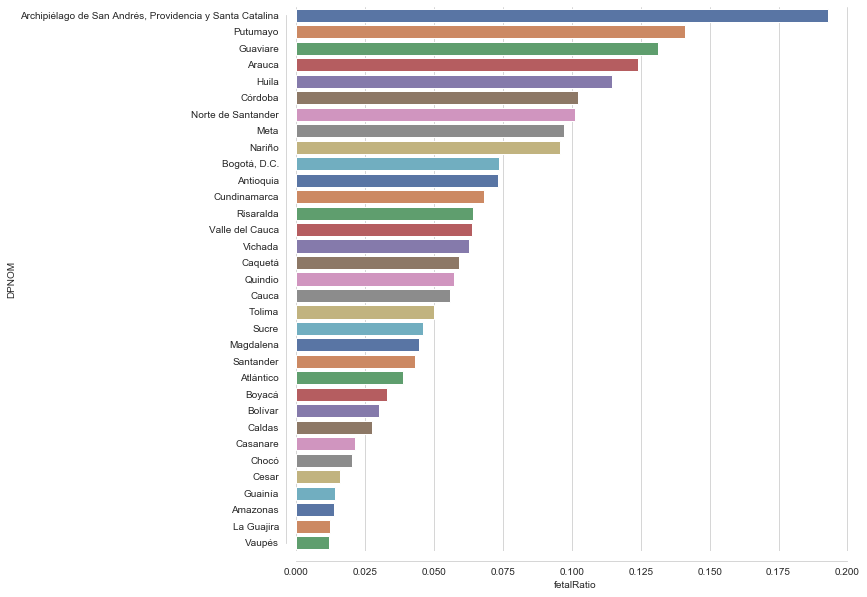

In [152]:
temp = df_dptos[df_dptos["year"] == 2017].sort_values(by="fetalRatio",ascending=False)
plt.figure(figsize=(10,10))
# sns.set_color_codes()
sns.barplot(data=temp,x= "fetalRatio",y = "DPNOM",orient ="h",color="cod_dpto",palette="deep")
sns.despine(offset=10, trim=True);
temp

,id_birth,count,alive,fetal,no_fetal,cod_dpto,deaths,mpio_name,year,Total,fetal_percapita,no_fetal_percapita,alive_percapita,deaths_percapita,prob_alive,prob_fetal,prob_no_fetal,Total pregnan,fetalRatio
9458,5360,171,38,133,0,5,133,ITAGÜÍ,2017,272206,0.048860,0.000000,0.013960,0.048860,0.222222,0.777778,0.000000,171,0.777778
9522,5890,1299,1043,253,3,5,256,YOLOMBÓ,2017,22208,1.139229,0.013509,4.696506,1.152738,0.802925,0.194765,0.002309,1296,0.195216
9412,5045,4448,3658,754,36,5,790,APARTADÓ,2017,119318,0.631925,0.030171,3.065757,0.662096,0.822392,0.169514,0.008094,4412,0.170898
9476,5541,9,8,1,0,5,1,PEÑOL,2017,20463,0.004887,0.000000,0.039095,0.004887,0.888889,0.111111,0.000000,9,0.111111
9484,5615,5373,4785,545,43,5,588,RIONEGRO,2017,130128,0.418818,0.033044,3.677149,0.451863,0.890564,0.101433,0.008003,5330,0.102251
9446,5266,3258,2919,328,11,5,339,ENVIGADO,2017,221252,0.148247,0.004972,1.319310,0.153219,0.895948,0.100675,0.003376,3247,0.101016
9435,5172,2193,1961,202,30,5,232,CHIGORODÓ,2017,56584,0.356991,0.053019,3.465644,0.410010,0.894209,0.092111,0.013680,2163,0.093389
9418,5088,70,64,6,0,5,6,BELLO,2017,504580,0.001189,0.000000,0.012684,0.001189,0.914286,0.085714,0.000000,70,0.085714
9401,5001,46745,42702,3574,469,5,4043,MEDELLÍN,2017,2414616,0.148015,0.019423,1.768480,0.167439,0.913509,0.076457,0.010033,46276,0.077232
9423,5113,35,32,2,1,5,3,BURITICÁ,2017,8839,0.022627,0.011313,0.362032,0.033940,0.914286,0.057143,0.028571,34,0.058824


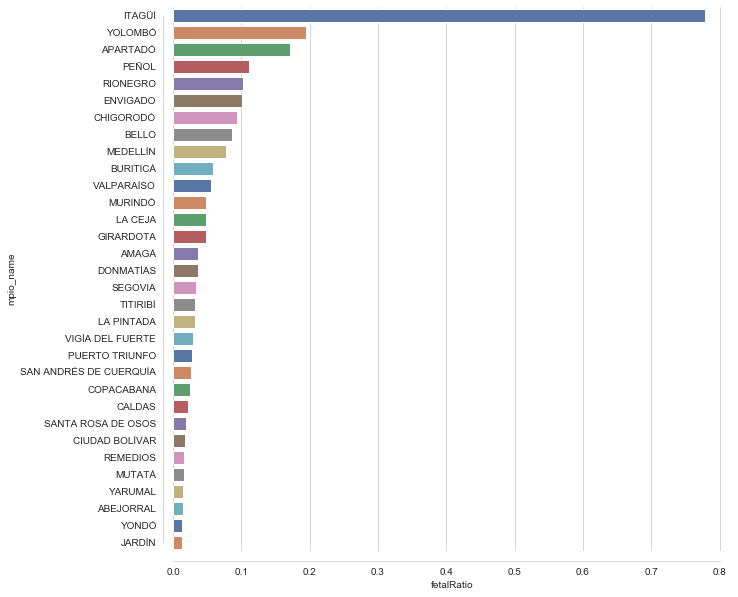

In [151]:

temp = df_munic[(df_munic["year"] == 2017) & (df_munic["cod_dpto"] == 5)].sort_values(by="fetalRatio",ascending=False)[:32]
plt.figure(figsize=(10,10))
# sns.set_color_codes()
sns.barplot(data=temp,x= "fetalRatio",y = "mpio_name",orient ="h",color="cod_dpto",palette="deep")
sns.despine(offset=10, trim=True);
temp

,year,cod_dpto,alive,fetal,no_fetal,deaths,Total,fetal_percapita,no_fetal_percapita,alive_percapita,deaths_percapita,DPNOM,Total preg,Total pregnan,prob_alive,prob_fetal,prob_no_fetal,fetalRatio
270,2008,88,812,253,10,263,58813,0.430177,0.017003,1.380647,0.447180,"Archipiélago de San Andrés, Providencia y Sant...",1075,1065,0.755349,0.235349,0.009302,0.237559
271,2009,88,881,256,9,265,59121,0.433010,0.015223,1.490164,0.448233,"Archipiélago de San Andrés, Providencia y Sant...",1146,1137,0.768761,0.223386,0.007853,0.225154
277,2015,88,806,231,17,248,60896,0.379335,0.027916,1.323568,0.407252,"Archipiélago de San Andrés, Providencia y Sant...",1054,1037,0.764706,0.219165,0.016129,0.222758
278,2016,88,848,226,9,235,61202,0.369269,0.014705,1.385576,0.383974,"Archipiélago de San Andrés, Providencia y Sant...",1083,1074,0.783010,0.208680,0.008310,0.210428
279,2017,88,804,192,15,207,61504,0.312175,0.024389,1.307232,0.336563,"Archipiélago de San Andrés, Providencia y Sant...",1011,996,0.795252,0.189911,0.014837,0.192771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,2010,8,35780,262,558,820,2285078,0.011466,0.024419,1.565811,0.035885,Atlántico,36600,36042,0.977596,0.007158,0.015246,0.007269
10,2008,8,42210,296,748,1044,2240312,0.013212,0.033388,1.884113,0.046601,Atlántico,43254,42506,0.975864,0.006843,0.017293,0.006964
301,2009,95,1451,10,8,18,49255,0.020303,0.016242,2.945894,0.036545,Guaviare,1469,1461,0.987747,0.006807,0.005446,0.006845
302,2010,95,1335,8,9,17,51297,0.015595,0.017545,2.602491,0.033140,Guaviare,1352,1343,0.987426,0.005917,0.006657,0.005957


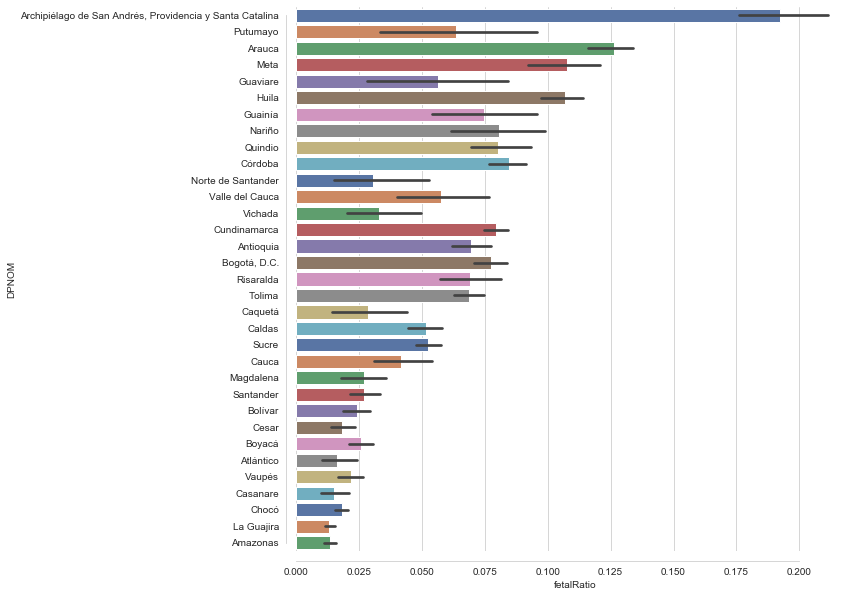

In [156]:
temp = df_dptos.sort_values(by="prob_fetal",ascending=False)
plt.figure(figsize=(10,10))
# sns.set_color_codes()
sns.barplot(data=temp,x= "fetalRatio",y = "DPNOM",orient ="h",color="cod_dpto",palette="deep")
sns.despine(offset=10, trim=True);


In [169]:

Top5 = df_dptos.groupby(["cod_dpto","DPNOM"])["fetalRatio"].mean().reset_index().sort_values(by="fetalRatio",ascending=False)[:5]
Top5

,cod_dpto,DPNOM,fetalRatio
27,88,"Archipiélago de San Andrés, Providencia y Sant...",0.192314
24,81,Arauca,0.126217
15,50,Meta,0.107805
12,41,Huila,0.106707
9,23,Córdoba,0.084421


In [177]:
IsSanAndres = df_dptos.cod_dpto == 88


0      False
1      False
2      False
3      False
4      False
       ...  
325    False
326    False
327    False
328    False
329    False
Name: cod_dpto, Length: 330, dtype: bool

,year,cod_dpto,alive,fetal,no_fetal,deaths,Total,fetal_percapita,no_fetal_percapita,alive_percapita,deaths_percapita,DPNOM,Total preg,Total pregnan,prob_alive,prob_fetal,prob_no_fetal,fetalRatio
279,2017,88,804,192,15,207,61504,0.312175,0.024389,1.307232,0.336563,"Archipiélago de San Andrés, Providencia y Sant...",1011,996,0.795252,0.189911,0.014837,0.192771
129,2017,41,20355,2632,206,2838,1085548,0.242458,0.018977,1.875090,0.261435,Huila,23193,22987,0.877635,0.113483,0.008882,0.114499
159,2017,50,15860,1708,167,1875,1016553,0.168019,0.016428,1.560174,0.184447,Meta,17735,17568,0.894277,0.096307,0.009416,0.097222
249,2017,81,4647,658,25,683,239211,0.275071,0.010451,1.942636,0.285522,Arauca,5330,5305,0.871857,0.123452,0.004690,0.124034
99,2017,23,27000,3070,445,3515,1730939,0.177360,0.025709,1.559847,0.203069,Córdoba,30515,30070,0.884811,0.100606,0.014583,0.102095
98,2016,23,26385,2829,476,3305,1700080,0.166404,0.027999,1.551986,0.194403,Córdoba,29690,29214,0.888683,0.095285,0.016032,0.096837
158,2016,50,15473,2030,198,2228,994750,0.204071,0.019904,1.555466,0.223976,Meta,17701,17503,0.874131,0.114683,0.011186,0.115980
128,2016,41,20087,2769,225,2994,1082623,0.255768,0.020783,1.855401,0.276551,Huila,23081,22856,0.870283,0.119969,0.009748,0.121150
248,2016,81,4410,667,23,690,222543,0.299717,0.010335,1.981640,0.310052,Arauca,5100,5077,0.864706,0.130784,0.004510,0.131377
278,2016,88,848,226,9,235,61202,0.369269,0.014705,1.385576,0.383974,"Archipiélago de San Andrés, Providencia y Sant...",1083,1074,0.783010,0.208680,0.008310,0.210428


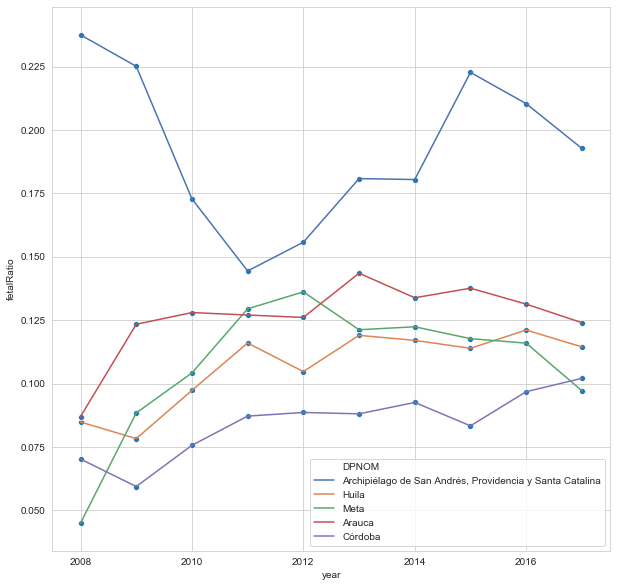

In [176]:
temp = df_dptos[df_dptos.DPNOM.isin(Top5.DPNOM)].sort_values(by="year",ascending=False)
plt.figure(figsize=(10,10))
# sns.set_color_codes()
sns.lineplot(data=temp,x= "year",y = "fetalRatio",hue="DPNOM",color="cod_dpto",palette="deep")
sns.scatterplot(data=temp,x= "year",y = "fetalRatio",palette="deep")
temp

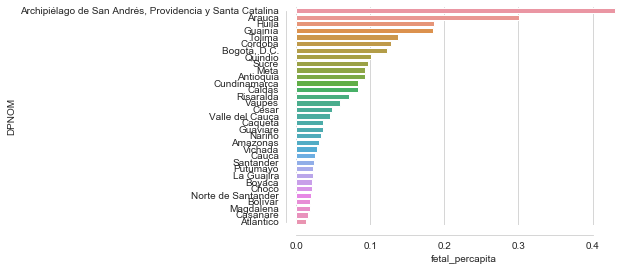

In [113]:
animate(1)

In [108]:
def animate(i):
    
    temp = df_dptos[df_dptos["year"] == i+2007].sort_values(by="fetal_percapita",ascending=False)
    
    sns.set_color_codes(palette="pastel")
    test = sns.barplot(temp["fetal_percapita"],temp["DPNOM"],orient ="h")
    sns.despine(offset=10, trim=True);
    return test

In [114]:
fig = plt.figure(figsize=(10,10))
# anim = matplotlib.animation.FuncAnimation(fig, animate, frames=5, repeat=True)
anim = animation.FuncAnimation(fig, animate, frames=5, interval=20, blit=True) 
plt.show()

Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\envs\DS4A\lib\site-packages\matplotlib\cbook\__init__.py", line 216, in process
    func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\DS4A\lib\site-packages\matplotlib\animation.py", line 953, in _start
    self._init_draw()
  File "C:\ProgramData\Anaconda3\envs\DS4A\lib\site-packages\matplotlib\animation.py", line 1732, in _init_draw
    self._draw_frame(next(self.new_frame_seq()))
  File "C:\ProgramData\Anaconda3\envs\DS4A\lib\site-packages\matplotlib\animation.py", line 1755, in _draw_frame
    self._drawn_artists = self._func(framedata, *self._args)
  File "<ipython-input-108-1633e73b7b00>", line 6, in animate
    test = sns.barplot(temp["fetal_percapita"],temp["DPNOM"],orient ="h")
  File "C:\ProgramData\Anaconda3\envs\DS4A\lib\site-packages\seaborn\categorical.py", line 3147, in barplot
    errcolor, errwidth, capsize, dodge)
  File "C:\ProgramData\Anaconda3\envs\DS4A\lib\site-packages\seaborn\categoric

<Figure size 720x720 with 0 Axes>

In [110]:
anim.save('coil.gif',writer='imagemagick') 

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


IndexError: list index out of range